REF : https://github.com/ryuichiueda/probrobo_practice/blob/master/state_equations/with_noise.ipynb

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

from matplotlib import animation
from IPython.display import HTML

In [2]:
X0 = np.array([0, 0, 0])
u = np.array([0.1, np.deg2rad(30)])

def f(x_old, u):
    pos_x, pos_y, pos_th = x_old
    pure_l, pure_omega = u
    l = random.gauss(pure_l, pure_l/10)
    pos_th = random.gauss(pos_th, np.deg2rad(3))
    omega = random.gauss(pure_omega, pure_omega/10)
    pos_x += l * math.cos(pos_th)
    pos_y += l * math.sin(pos_th)
    pos_th += omega
    return np.array([pos_x, pos_y, pos_th])

In [3]:
print(X0)

[0 0 0]


In [4]:
X1 = f(X0,u)
print(X1)

[ 0.1055202  -0.00652291  0.48948463]


In [5]:
X2 = f(X1,u)
print(X2)

[ 0.18578239  0.0311847   0.94281902]


[array([0, 0, 0]), array([ 0.10843164,  0.00632795,  0.6451116 ]), array([ 0.17219223,  0.05798056,  1.14102819]), array([ 0.2187328 ,  0.15934864,  1.57128924]), array([ 0.22276219,  0.27757228,  2.10034531]), array([ 0.1719441 ,  0.3631308 ,  2.76983204]), array([ 0.08767542,  0.39424223,  3.41201457]), array([-0.01534338,  0.36886284,  3.92872597]), array([-0.07670313,  0.3057139 ,  4.43578991]), array([-0.09903497,  0.20845746,  4.97653791]), array([-0.07417847,  0.12028412,  5.3783497 ])]


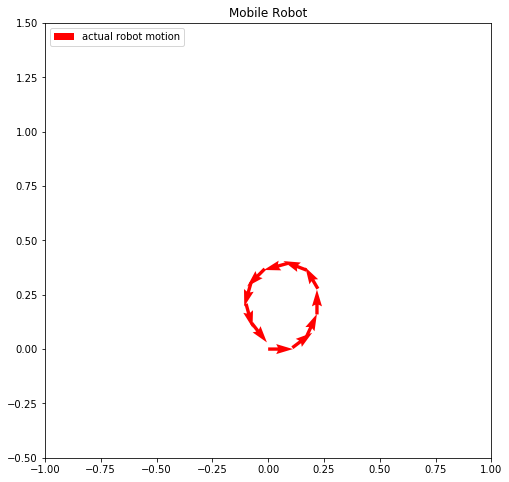

In [6]:
# タイトル付き新規ウィンドウ、座標軸を用意
fig = plt.figure(figsize=(8, 8))
plt.title("Mobile Robot")
world = fig.add_subplot(1,1,1)
world.set_xlim(-1.0,1.0)
world.set_ylim(-0.5,1.5)

history = [X0]
X = X0

for i in range(10):
    X = f(X, u)
    history.append(X)

print(history)

xs = [e[0] for e in history]
ys = [e[1] for e in history]
vxs = [math.cos(e[2]) for e in history]
vys = [math.sin(e[2]) for e in history]

world.quiver(xs,ys,vxs,vys,color="red",label="actual robot motion")

# 左上に凡例を追加
world.legend(loc='upper left')

# 現在の状態を確認
plt.show()